___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code.

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [2]:
# Kyphosis is spinal condition

df = pd.read_csv('kyphosis.csv')

In [6]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [10]:
# 81 rows, 4 columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


* **Age** column in months (data is on children)
* **Number** column is number of vertebrae involved in the operation
* **Start** column the number of the first vertabrae operated on (discrete values)


**Target** column is whether patient still had kyphosis after corrective surgery.

## EDA

We'll just check out a simple pairplot for this small dataset.

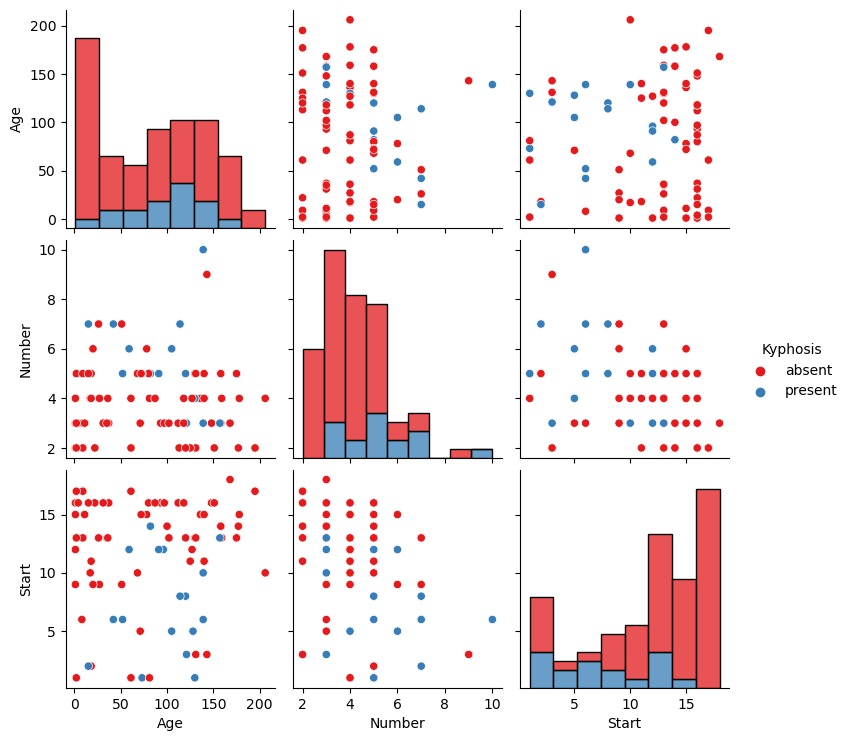

In [9]:
sns.pairplot(df, hue='Kyphosis', palette='Set1', diag_kind='hist', diag_kws={'multiple': "stack"});

In [ ]:
# Some separation between having kyphosis or not depending on the number of vertabrae involved 
# Majority of patients did not have kyphosis, but blue dots are somewhat clustered

## Train Test Split

Let's split up the data into a training set and a test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Kyphosis', axis=1)

y = df['Kyphosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.90      0.86      0.88        22
     present       0.25      0.33      0.29         3

    accuracy                           0.80        25
   macro avg       0.58      0.60      0.58        25
weighted avg       0.83      0.80      0.81        25



In [ ]:
# Very low scores for presence of kyphosis due to imbalanced dataset, but overall accuracy is 80% which is not so bad

In [20]:
print(confusion_matrix(y_test, predictions))

[[19  3]
 [ 2  1]]


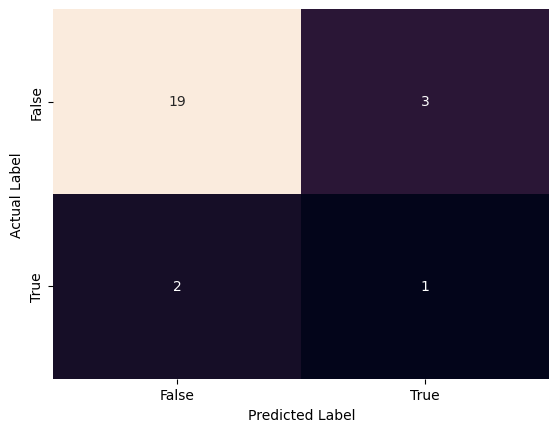

In [22]:
sns.heatmap(confusion_matrix(y_test, predictions), 
            annot=True, 
            linecolor='black', 
            xticklabels=['False', 'True'], 
            yticklabels=['False', 'True'], 
            cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

In [ ]:
# Only mislabelling 3 instances from the test set, so not doing too bad

## Tree Visualization

SciKit Learn has some built-in visualization capabilities for decision trees, although you won't use this often as it requires you to install the **pydot** library, but below is an example of what it looks like and the code to execute.

Install via your Anaconda prompt: `conda install pydot`

In [27]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [28]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

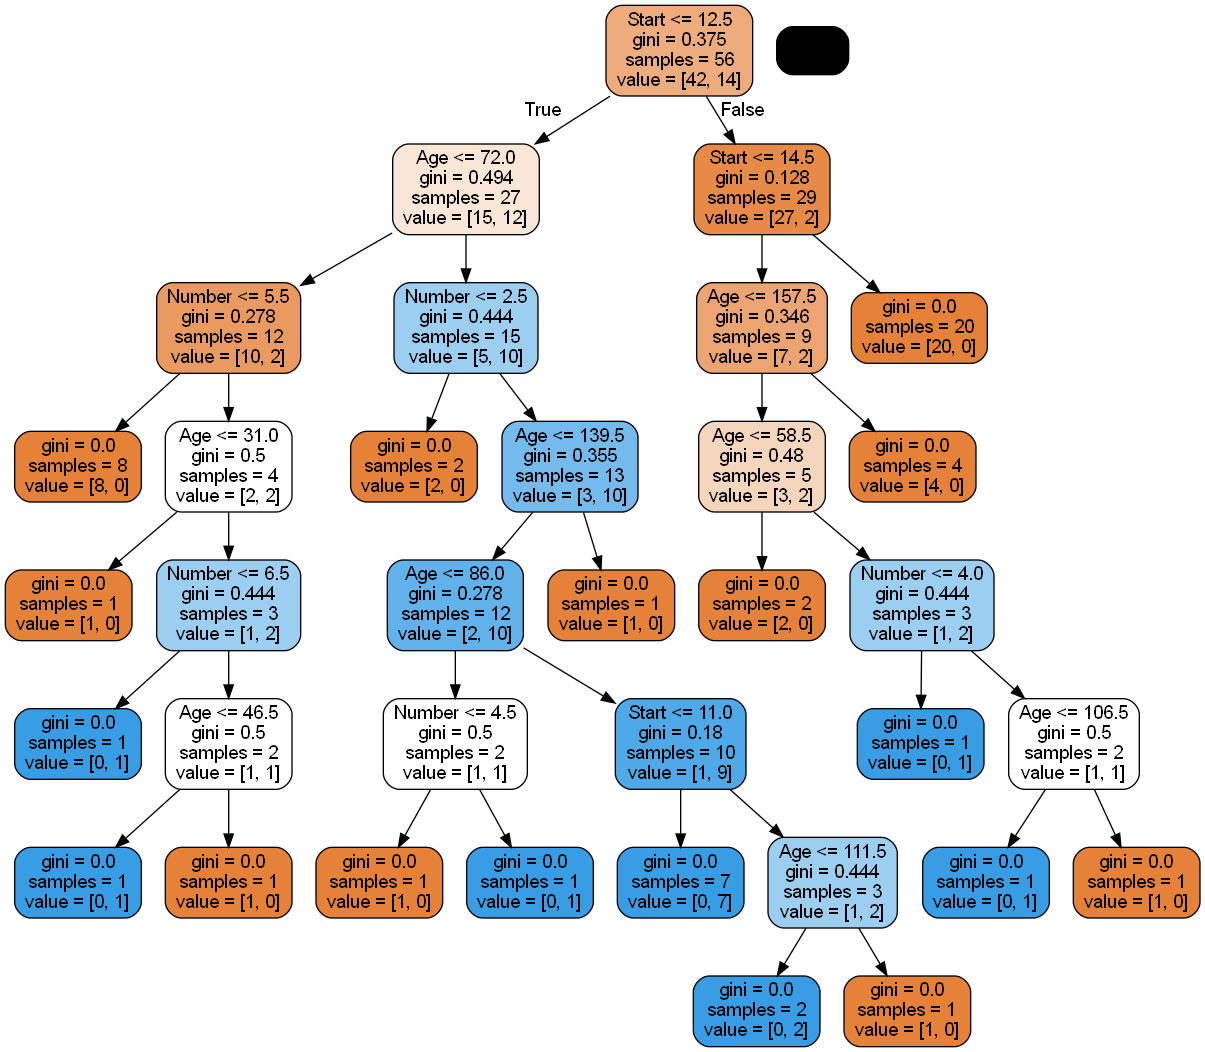

In [29]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Build 100 trees!
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test, rfc_pred))

[[21  1]
 [ 2  1]]


In [33]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        22
     present       0.50      0.33      0.40         3

    accuracy                           0.88        25
   macro avg       0.71      0.64      0.67        25
weighted avg       0.86      0.88      0.87        25



In [ ]:
# Scores improved by at least 10%, but stil 3 instances were mislabelled
# Generally, Random Forest outshines with larger datasets, but this data is too small to make a big difference in scores

# Great Job!